In [8]:
import pandas as pd

In [9]:
%store -r df

In [10]:
df.head()

,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,0.0,0.0
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00,1.0,0.0
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,0.0,0.0
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00,1.0,0.0
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00,1.0,0.0


In [11]:
df['too_fast'] = df['time_spent'] < 60
df['too_slow'] = df['time_spent'] > 1000
too_fast_stat = df.pivot_table(index='id', values='too_fast')

In [46]:
good_ids = too_fast_stat.loc[too_fast_stat['too_fast'] < 0.5]

In [50]:
good_data = df.query('id in @good_ids.index and 60 <= time_spent <= 1000')

In [51]:
print(len(df),'   ',len(good_data))

317104     154601


In [53]:
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')

array([[<Axes: title={'center': 'time_spent'}>]], dtype=object)

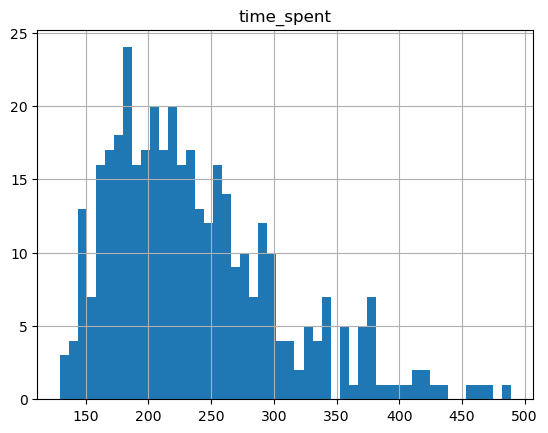

In [54]:
good_stations_stat.hist(bins=50)

In [62]:
stat = df.pivot_table(index='name', values='time_spent')

In [58]:
good_stat = good_data.pivot_table(index='name',values='time_spent', aggfunc='median')
good_stat.sort_values(by='time_spent',ascending=True)

,time_spent
name,
Белоцветник,154.0
Бальзамин,158.0
Незабудка,161.0
Колокольчик,161.0
Обриета,167.0
Функия,171.5
Гацания,178.5
Аммобиум,180.5
Пион,180.5


In [59]:
%store good_data

Stored 'good_data' (DataFrame)


In [63]:
stat.head()

,time_spent
name,
Агератум,337.802721
Амарант,132.760012
Аммобиум,256.708042
Арктотис,73.879984
Астильба,376.143149


In [71]:
stat['good_time_spent'] = good_stat['time_spent']

In [72]:
stat.head()

,time_spent,good_time_spent
name,,
Агератум,337.802721,309.0
Амарант,132.760012,187.5
Аммобиум,256.708042,180.5
Арктотис,73.879984,185.0
Астильба,376.143149,423.0


In [74]:
id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])

In [75]:
id_name

,first,count
,name,name
id,,
00ca1b70,Вероника,131
0178ce70,Василёк,164
01abf4e9,Гацания,30
030a9067,Колокольчик,228
03740f2d,Василёк,157
...,...,...
fb6610be,Колокольчик,426
fbbd8cc2,Роза,82


In [76]:
id_name.columns = ['name', 'count']
id_name.head()

,name,count
id,,
00ca1b70,Вероника,131
0178ce70,Василёк,164
01abf4e9,Гацания,30
030a9067,Колокольчик,228
03740f2d,Василёк,157


In [78]:
station_stat_full = id_name.join(good_stations_stat)

,name,count,time_spent
id,,,
00ca1b70,Вероника,131,166.0
0178ce70,Василёк,164,234.5
01abf4e9,Гацания,30,181.5
030a9067,Колокольчик,228,135.5
03740f2d,Василёк,157,289.0
...,...,...,...
fb6610be,Колокольчик,426,161.0
fbbd8cc2,Роза,82,454.5
fc4b1b72,Василёк,543,340.0


In [79]:
station_stat_full.head()

,name,count,time_spent
id,,,
00ca1b70,Вероника,131,166.0
0178ce70,Василёк,164,234.5
01abf4e9,Гацания,30,181.5
030a9067,Колокольчик,228,135.5
03740f2d,Василёк,157,289.0


array([[<Axes: title={'center': 'count'}>]], dtype=object)

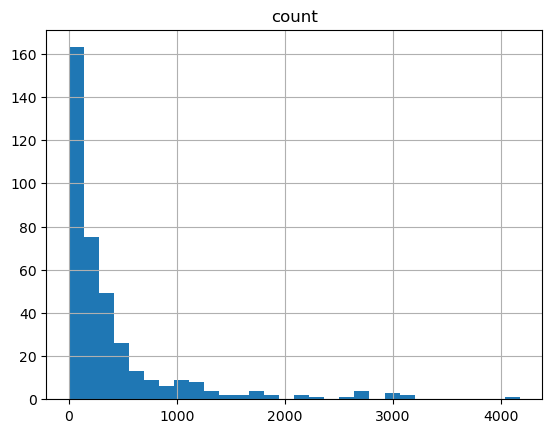

In [82]:
station_stat_full.hist(column='count', bins=30)

array([[<Axes: title={'center': 'count'}>]], dtype=object)

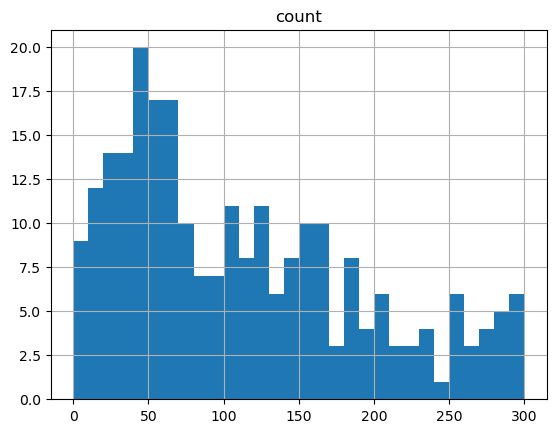

In [83]:
station_stat_full.hist(column='count', bins=30, range=(0,300)) 

In [84]:
%store station_stat_full

Stored 'station_stat_full' (DataFrame)
